# Exercise 1
## Support vector machines.
Perception is an important step for autonomous systems. We will look into one method of classifying data given a dataset containing inputs and corresponding targets. In this case we will look at the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), but it could just as well have been a point cloud or images of people or dogs and cats.

Today we will work with classification using [support vector machines](https://en.wikipedia.org/wiki/Support-vector_machine).
We will use the built in function from sklearn. 

In [2]:
import sklearn as sk
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


import pandas as pd
import numpy as np


%matplotlib inline

# Helper function for plotting the fit of your SVM.
def plot_fit(X, y, clf):
    """
    X = samples
    y = Ground truth
    clf = trained model
    """
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors= "black")
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

In [8]:
# Import some data to play with
iris = sk.datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
display(iris_df)
X = iris_df.iloc[:,:2]
display(X)
y = iris.target
print ("Number of data points ::", X.shape[0])
print("Number of features ::", X.shape[1])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Number of data points :: 150
Number of features :: 2


## Pandas
We will use pandas to manage our data.
Initially we will only use the two first data points, i.e. the sepal length and sepal width.

We plot the data and we can see all our samples

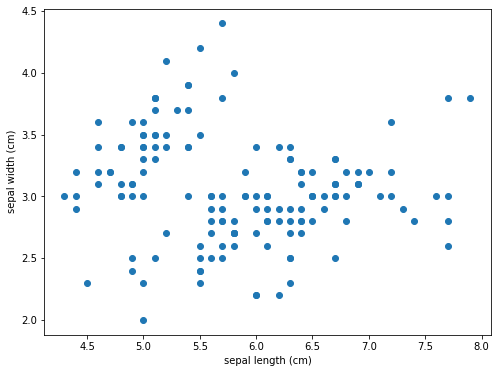

In [10]:
fig1 = plt.figure(1, figsize=(8, 6))
ax = plt.scatter(X['sepal length (cm)'], X["sepal width (cm)"])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

## Normalization.
Using sklearns preprocessing we can normalize the data to have zero mean and 1 variance.

```{Python}
X_scaled = StandardScaler().fit_transform(X)
```
Plot the data, did you succed with normalizing the data?



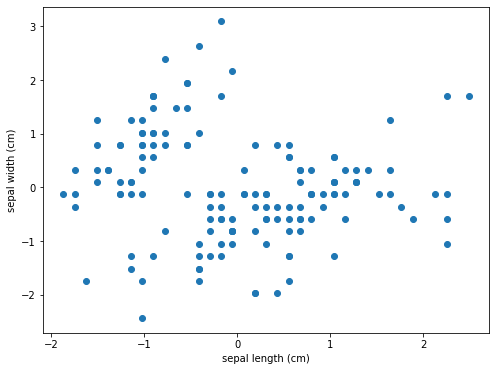

In [18]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled.shape
fig1 = plt.figure(1, figsize=(8, 6))
ax = plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

### Training / testing split.
We now create a training and testing set.
The training set is to train our model and the testing set is to make sure we dont overfit to the data.

you can use the following function to creat your training and testing split
```{Python}
train_test_split(data, target, test_size=n)
```

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

## Train and test the accuracy of your model
using sklearns LinearSVC:
```{Python}
sk.svm.LinearSVC(penalty='l2', loss='squared_hinge', random_state=0, max_iter=10e4)
```
[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=linearsvc#sklearn.svm.LinearSVC)

you can test the accuracy of your trained model with:
```{}
clf.score(X_train, y_train))
clf.score(X_test, y_test))
```

And finally plot your fit with the provided plot function **plot_fit**

In [39]:
SVM = sk.svm.LinearSVC(penalty='l2',
                loss='squared_hinge',
                random_state=42,
                max_iter=10e4)

SVM.fit(X_train, y_train)

print("Training score:", SVM.score(X_train, y_train))
print("Testing score:", SVM.score(X_test, y_test))

Training score: 0.7874015748031497
Testing score: 0.8260869565217391


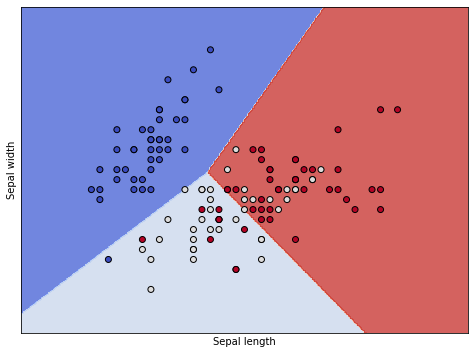

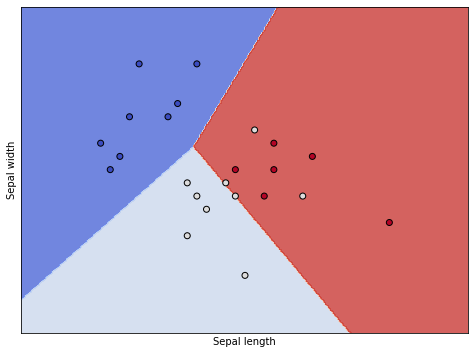

In [44]:

#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

plot_fit(X_train, y_train, SVM)
plt.show()
plot_fit(X_test, y_test, SVM)
plt.show()

## Exercises
### 1) Kernel
First exersice is to try other kernels than linear:
```{python}
svc = svm.SVC(kernel='linear', C=C)
rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C))
poly_svc = svm.SVC(kernel='poly', degree=degree, C=C))
```
[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

![Kernel](Kernels.png)

In [57]:
######## PARAMETERS #########
C = 1.0                     # Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
gamma = "scale" #Default    # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma.
degree = 3                  # Degree of polynomial kernel
######## PARAMETERS #########
# 1 
svc_classifier = sk.svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
# 2
rbf_svc_classifier = sk.svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(X_train, y_train)
# 3
poly_svc_classifier = sk.svm.SVC(kernel='poly', degree=degree, C=C).fit(X_train, y_train)

TEST SCORE: 0.8260869565217391
TRAIN SCORE: 0.8110236220472441


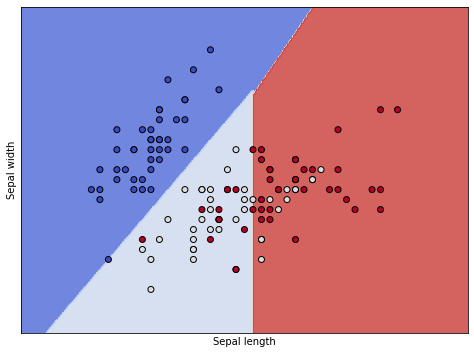

In [70]:
plot_fit(X_train, y_train, svc_classifier)
print("TEST SCORE:", svc_classifier.score(X_test, y_test))
print("TRAIN SCORE:", svc_classifier.score(X_train, y_train))
plt.show()

TEST SCORE: 0.8695652173913043
TRAIN SCORE: 0.8031496062992126


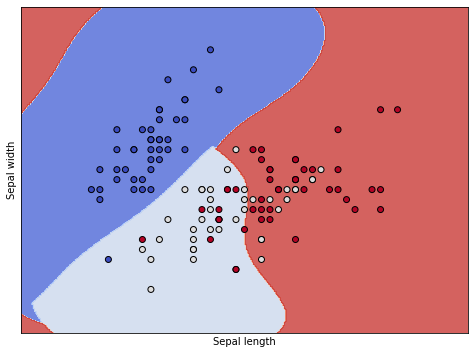

In [71]:
plot_fit(X_train, y_train, rbf_svc_classifier)
print("TEST SCORE:", rbf_svc_classifier.score(X_test, y_test))
print("TRAIN SCORE:", rbf_svc_classifier.score(X_train, y_train))
plt.show()

TEST SCORE: 0.6956521739130435
TRAIN SCORE: 0.7480314960629921


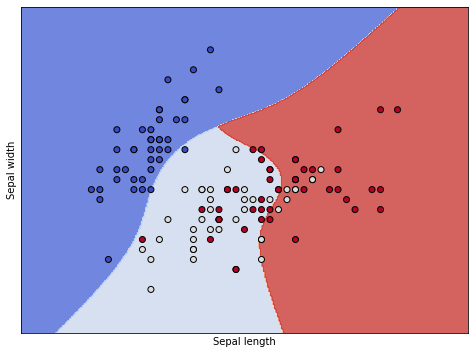

In [72]:
plot_fit(X_train, y_train, poly_svc_classifier)
print("TEST SCORE:", poly_svc_classifier.score(X_test, y_test))
print("TRAIN SCORE:", poly_svc_classifier.score(X_train, y_train))
plt.show()


Do you get better results?
### 2 ) More dimensions
Now use 3 data points for each sample. So either you add petal length or petal width.

Can you get a better fit?

Can you visualize your predictions? 
A 3d scatterplot with colors for each predicted class?
```{Python}
fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(x, y, z, c=class_vector)
```


In [76]:
X2 = iris_df.iloc[:,:3]
X2_scaled = StandardScaler().fit_transform(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y, test_size=0.15, random_state=42)

In [89]:
######## PARAMETERS #########
C = 1.0                     # 
gamma = "scale" #Default    # 
degree = 3                  # 
######## PARAMETERS #########
# 1 
svc_classifier = sk.svm.SVC(kernel='linear', C=C).fit(X2_train, y2_train)
# 2
rbf_svc_classifier = sk.svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(X2_train, y2_train)
# 3
poly_svc_classifier = sk.svm.SVC(kernel='poly', degree=degree, C=C).fit(X2_train, y2_train)

C:\Users\henri\AppData\Local\Temp\ipykernel_21200\3532213828.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


Text(0.5, 0.92, 'Original scaled data')

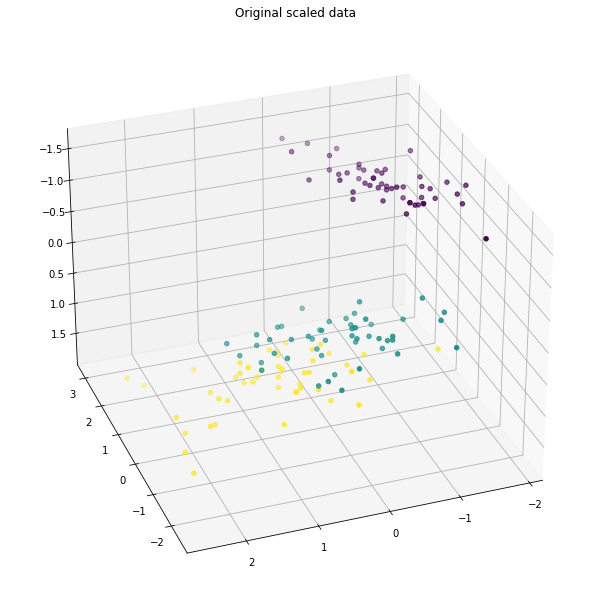

In [121]:
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X2_scaled[:, 0], X2_scaled[:, 1], X2_scaled[:, 2], c=y*256/2)
ax.set_title("Original scaled data")

In [134]:
prediction = svc_classifier.predict(X2_scaled)
print("SCORE:", svc_classifier.score(X2_scaled, y))
print("Test SCORE:", svc_classifier.score(X2_test, y2_test))

SCORE: 0.9666666666666667
Test SCORE: 0.9565217391304348


In [135]:
prediction = rbf_svc_classifier.predict(X2_scaled)
print("SCORE:", rbf_svc_classifier.score(X2_scaled, y))
print("Test SCORE:", rbf_svc_classifier.score(X2_test, y2_test))

SCORE: 0.9666666666666667
Test SCORE: 1.0


In [136]:
prediction = poly_svc_classifier.predict(X2_scaled)
print("SCORE:", poly_svc_classifier.score(X2_scaled, y))
print("Test SCORE:", poly_svc_classifier.score(X2_test, y2_test))

SCORE: 0.8866666666666667
Test SCORE: 0.9130434782608695


**NB** Moving to 3D space clearly made the data linearly seperable, and our linear model again performed best.


### 3) Even more dimensions
Finally try with all the data so you have 4 datapoints pr sample.

In [138]:
X3 = iris_df.iloc[:,:3]
X3_scaled = StandardScaler().fit_transform(X3)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y, test_size=0.15, random_state=42)

In [139]:
######## PARAMETERS #########
C = 1.0                     # 
gamma = "scale" #Default    # 
degree = 3                  # 
######## PARAMETERS #########
# 1 
svc_classifier = sk.svm.SVC(kernel='linear', C=C).fit(X3_train, y3_train)
# 2
rbf_svc_classifier = sk.svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(X3_train, y3_train)
# 3
poly_svc_classifier = sk.svm.SVC(kernel='poly', degree=degree, C=C).fit(X3_train, y3_train)

In [140]:
prediction = svc_classifier.predict(X3_scaled)
print("SCORE:", svc_classifier.score(X3_scaled, y))
print("Test SCORE:", svc_classifier.score(X3_test, y3_test))

SCORE: 0.9666666666666667
Test SCORE: 0.9565217391304348


In [141]:
prediction = rbf_svc_classifier.predict(X3_scaled)
print("SCORE:", rbf_svc_classifier.score(X3_scaled, y))
print("Test SCORE:", rbf_svc_classifier.score(X3_test, y3_test))

SCORE: 0.9666666666666667
Test SCORE: 1.0


In [142]:
prediction = poly_svc_classifier.predict(X3_scaled)
print("SCORE:", poly_svc_classifier.score(X3_scaled, y))
print("Test SCORE:", poly_svc_classifier.score(X3_test, y3_test))

SCORE: 0.8866666666666667
Test SCORE: 0.9130434782608695
